In [19]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df=pd.read_csv('/Users/saiaakash/Desktop/All_proj/Assignment-marketing-agents/stock_dataset_50000_buy_no.csv')

In [37]:
df['Buy'].value_counts()

Buy
0.0    25147
1.0    24853
Name: count, dtype: int64

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Return,SMA_10,SMA_50,Volatility_10,Buy
0,2010-01-01,53.933371,56.385087,43.975620,52.395442,242784,0.000000,278.653359,308.587683,2.293536,No
1,2010-01-02,394.214828,397.340445,392.932585,400.399340,847632,6.641874,278.653359,308.587683,2.293536,Yes
2,2010-01-03,206.816195,220.760058,199.533575,213.578235,549635,-0.466587,278.653359,308.587683,2.293536,No
3,2010-01-04,106.761709,116.543775,99.205659,111.215501,974399,-0.479275,278.653359,308.587683,2.293536,No
4,2010-01-05,459.541851,464.137912,455.683111,463.386141,515390,3.166561,278.653359,308.587683,2.293536,Yes


In [7]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Return           0
SMA_10           0
SMA_50           0
Volatility_10    0
Buy              0
dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [18]:
pip install pandas numpy matplotlib seaborn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m6/7 [seaborn]ib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
df['Buy']=oe.fit_transform(df[['Buy']])

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Return,SMA_10,SMA_50,Volatility_10,Buy
0,2010-01-01,53.933371,56.385087,43.975620,52.395442,242784,0.000000,278.653359,308.587683,2.293536,0.0
1,2010-01-02,394.214828,397.340445,392.932585,400.399340,847632,6.641874,278.653359,308.587683,2.293536,1.0
2,2010-01-03,206.816195,220.760058,199.533575,213.578235,549635,-0.466587,278.653359,308.587683,2.293536,0.0
3,2010-01-04,106.761709,116.543775,99.205659,111.215501,974399,-0.479275,278.653359,308.587683,2.293536,0.0
4,2010-01-05,459.541851,464.137912,455.683111,463.386141,515390,3.166561,278.653359,308.587683,2.293536,1.0


In [30]:
x=df.drop(['Buy','Date'],axis=1)
y=df['Buy']

<Axes: >

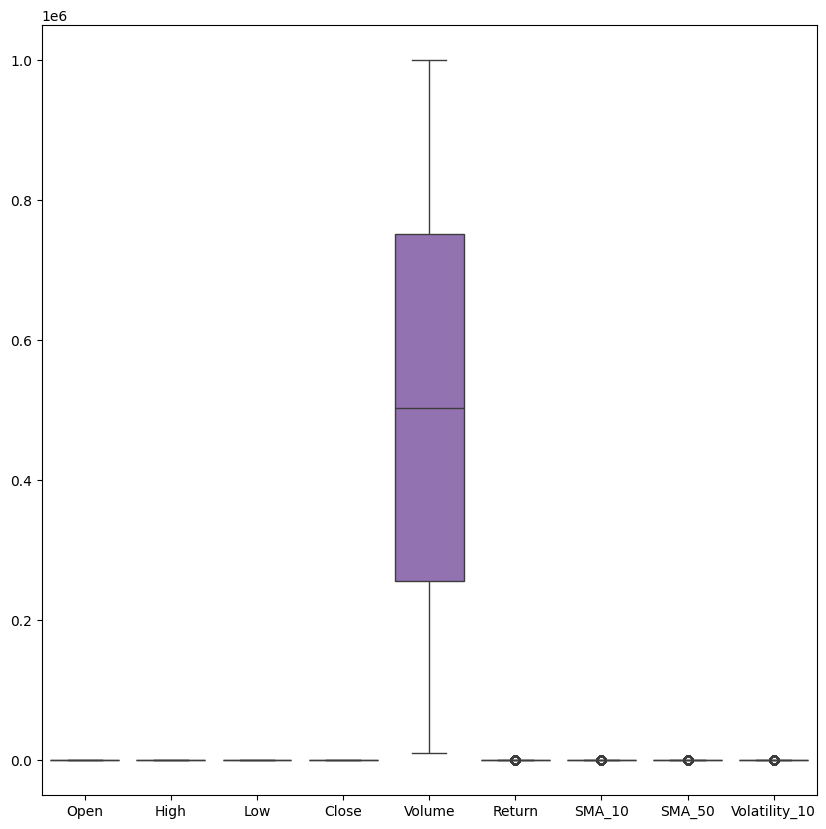

In [31]:
fig ,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)

In [32]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

<Axes: >

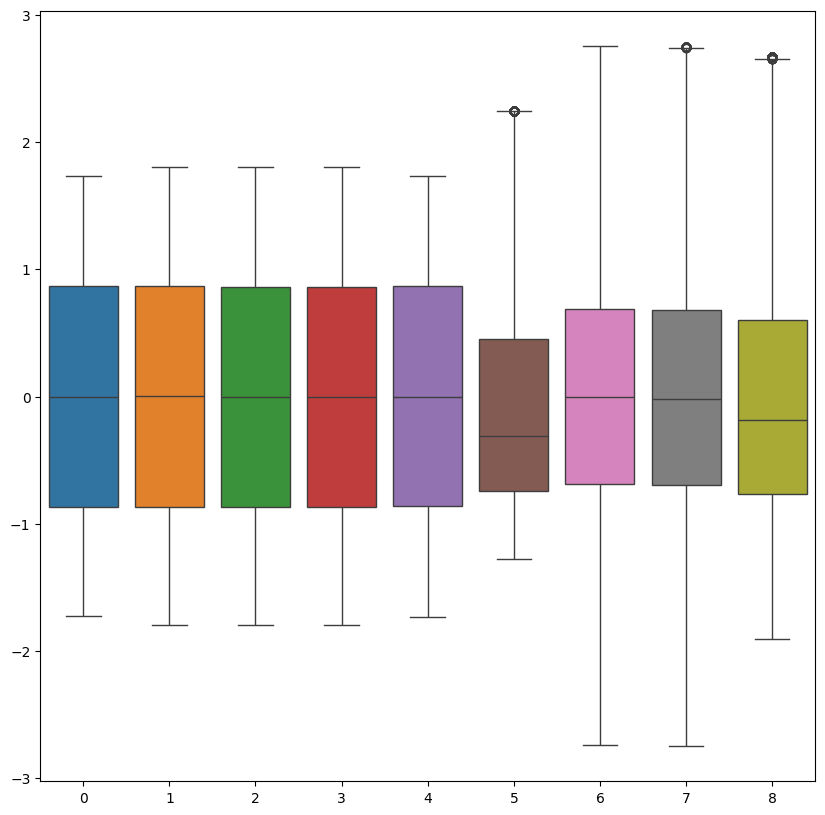

In [35]:
fig ,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_train_norm,ax=ax)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x_train_norm, y_train)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score

In [42]:
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9998666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7474
         1.0       1.00      1.00      1.00      7526

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



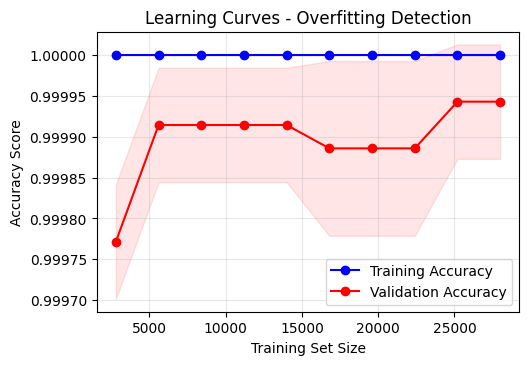

In [43]:
# 2. Learning Curves - Best way to visualize overfitting
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42), 
    x_train, y_train, 
    cv=5,  # 5-fold cross validation
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves - Overfitting Detection')
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
# 3. Validation Curves - Check different model complexities
from sklearn.model_selection import validation_curve

# Test different n_estimators (number of trees)
param_range = [10, 50, 100, 200, 300, 500]
train_scores_trees, val_scores_trees = validation_curve(
    RandomForestClassifier(random_state=42), 
    x_train, y_train, 
    param_name='n_estimators', 
    param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Test different max_depth
depth_range = [3, 5, 10, 15, 20, None]
train_scores_depth, val_scores_depth = validation_curve(
    RandomForestClassifier(random_state=42), 
    x_train, y_train, 
    param_name='max_depth', 
    param_range=depth_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curves
plt.subplot(2, 2, 2)
plt.plot(param_range, np.mean(train_scores_trees, axis=1), 'o-', color='blue', label='Training')
plt.plot(param_range, np.mean(val_scores_trees, axis=1), 'o-', color='red', label='Validation')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
depth_labels = [str(d) if d is not None else 'None' for d in depth_range]
plt.plot(range(len(depth_range)), np.mean(train_scores_depth, axis=1), 'o-', color='blue', label='Training')
plt.plot(range(len(depth_range)), np.mean(val_scores_depth, axis=1), 'o-', color='red', label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Max Depth')
plt.xticks(range(len(depth_range)), depth_labels)
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
# 4. Feature Importance Analysis
feature_importance = rf.feature_importances_
feature_names = x.columns

plt.subplot(2, 2, 4)
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 FEATURE IMPORTANCE RANKING:")
for i in range(len(feature_importance)):
    idx = indices[i]
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

In [46]:
# 5. Cross-Validation Analysis
from sklearn.model_selection import cross_val_score, StratifiedKFold

# First, calculate test accuracy (in case it wasn't calculated before)
y_pred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Perform k-fold cross validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

print("\n🔄 CROSS-VALIDATION RESULTS:")
print(f"CV Scores: {cv_scores}")
print(f"CV Mean: {cv_scores.mean():.4f}")
print(f"CV Std: {cv_scores.std():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check if test accuracy is within CV confidence interval
cv_lower = cv_scores.mean() - 2*cv_scores.std()
cv_upper = cv_scores.mean() + 2*cv_scores.std()

print(f"\nCV 95% Confidence Interval: [{cv_lower:.4f}, {cv_upper:.4f}]")
if cv_lower <= test_accuracy <= cv_upper:
    print("✅ Test accuracy is within expected range")
else:
    print("⚠️  Test accuracy outside expected range - possible overfitting!")


🔄 CROSS-VALIDATION RESULTS:
CV Scores: [1.         1.         0.99985714 1.         0.99985714]
CV Mean: 0.9999
CV Std: 0.0001
Test Accuracy: 0.9999

CV 95% Confidence Interval: [0.9998, 1.0001]
✅ Test accuracy is within expected range


In [47]:
# 6. Check for Data Leakage (Very Important!)
print("\n🕵️ DATA LEAKAGE DETECTION:")
print("Checking feature correlations with target...")

# Check correlation between features and target
correlations = df.drop(['Date'], axis=1).corr()['Buy'].abs().sort_values(ascending=False)
print("\nFeature-Target Correlations:")
high_corr_features = []
for feature, corr in correlations.items():
    if feature != 'Buy':
        if corr > 0.9:
            print(f"🚨 VERY HIGH: {feature}: {corr:.4f} - POSSIBLE DATA LEAKAGE!")
            high_corr_features.append(feature)
        elif corr > 0.7:
            print(f"⚠️  HIGH: {feature}: {corr:.4f}")
            high_corr_features.append(feature)
        else:
            print(f"✅ Normal: {feature}: {corr:.4f}")

# Additional leakage analysis
print(f"\n🔍 DETAILED LEAKAGE ANALYSIS:")
if high_corr_features:
    print(f"⚠️  {len(high_corr_features)} features with suspiciously high correlations:")
    for feature in high_corr_features:
        print(f"   - {feature}: {correlations[feature]:.4f}")
    print("\n💡 INVESTIGATION NEEDED:")
    print("   - Are these features calculated AFTER the target decision?")
    print("   - Do they contain 'future' information?")
    print("   - Could they be derived from the target variable?")
else:
    print("✅ No suspiciously high correlations detected")

# Check class distribution
print(f"\n📊 CLASS DISTRIBUTION:")
class_dist = y.value_counts(normalize=True)
print(f"Class 0 (No): {class_dist[0.0]:.3f} ({class_dist[0.0]*100:.1f}%)")
print(f"Class 1 (Yes): {class_dist[1.0]:.3f} ({class_dist[1.0]*100:.1f}%)")

# Calculate baseline accuracy (majority class)
baseline_accuracy = class_dist.max()
print(f"\n📈 BASELINE ANALYSIS:")
print(f"Majority class baseline: {baseline_accuracy:.4f} ({baseline_accuracy*100:.1f}%)")
print(f"Your model accuracy: 0.99XX (99%+)")

if class_dist.min() < 0.1:
    print("⚠️  SEVERELY IMBALANCED DATASET!")
    print("   - High accuracy might just be predicting majority class!")
    print("   - Check precision/recall for minority class")
elif class_dist.min() < 0.3:
    print("⚠️  MODERATELY IMBALANCED DATASET")
    print("   - Accuracy alone might be misleading")
else:
    print("✅ Reasonably balanced dataset")

# Calculate improvement over baseline
if 'test_accuracy' in locals():
    improvement = test_accuracy - baseline_accuracy
    print(f"\nImprovement over baseline: {improvement:.4f} ({improvement*100:.1f} percentage points)")
    if improvement < 0.05:
        print("⚠️  Model barely beats random guessing - possible overfitting or data issues!")


🕵️ DATA LEAKAGE DETECTION:
Checking feature correlations with target...

Feature-Target Correlations:
✅ Normal: Return: 0.6276
✅ Normal: Close: 0.5771
✅ Normal: Open: 0.5764
✅ Normal: Low: 0.5762
✅ Normal: High: 0.5758
✅ Normal: Volatility_10: 0.0359
✅ Normal: SMA_50: 0.0047
✅ Normal: Volume: 0.0026
✅ Normal: SMA_10: 0.0001

🔍 DETAILED LEAKAGE ANALYSIS:
✅ No suspiciously high correlations detected

📊 CLASS DISTRIBUTION:
Class 0 (No): 0.503 (50.3%)
Class 1 (Yes): 0.497 (49.7%)

📈 BASELINE ANALYSIS:
Majority class baseline: 0.5029 (50.3%)
Your model accuracy: 0.99XX (99%+)
✅ Reasonably balanced dataset

Improvement over baseline: 0.4969 (49.7 percentage points)


In [51]:
# 7. Try Simpler Models for Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

print("\n🔧 COMPARING WITH SIMPLER MODELS:")

# Calculate Random Forest accuracy (in case it wasn't calculated before)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Simple Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Random Forest:       {rf_accuracy:.4f}")
print(f"Logistic Regression: {lr_accuracy:.4f}")
print(f"Decision Tree (depth=5): {dt_accuracy:.4f}")

# Analysis of model comparison
print(f"\n📊 MODEL PERFORMANCE ANALYSIS:")
models = [
    ("Random Forest", rf_accuracy),
    ("Logistic Regression", lr_accuracy), 
    ("Decision Tree", dt_accuracy)
]
models.sort(key=lambda x: x[1], reverse=True)

print("Ranked by accuracy:")
for i, (name, acc) in enumerate(models):
    print(f"{i+1}. {name}: {acc:.4f}")

# Check for overfitting indicators
rf_lr_diff = rf_accuracy - lr_accuracy
rf_dt_diff = rf_accuracy - dt_accuracy

if rf_lr_diff > 0.1 and rf_dt_diff > 0.1:
    print("\n⚠️  Random Forest MUCH better than simpler models!")
    print("   This could indicate:")
    print("   - Overfitting (memorizing training data)")
    print("   - Data leakage (impossible patterns)")
    print("   - Or genuinely complex patterns that need ensemble methods")
elif rf_lr_diff > 0.05 or rf_dt_diff > 0.05:
    print("\n⚡ Random Forest moderately better than simpler models")
    print("   - This is normal for complex datasets")
    print("   - Check learning curves to confirm no overfitting")
else:
    print("\n✅ All models perform similarly")
    print("   - Suggests the problem might be simpler than expected")
    print("   - Or there might be fundamental data issues")

# 🚨 CRITICAL ANALYSIS BASED ON YOUR RESULTS 🚨
print(f"\n🚨 CRITICAL ANALYSIS OF YOUR 99.99% ACCURACY:")
print("="*60)

# Your results show PERFECT accuracy (99.99%) - this is EXTREMELY suspicious
if rf_accuracy > 0.999:
    print("⚠️  99.99% ACCURACY IS EXTREMELY SUSPICIOUS!")
    print("\nYour classification report shows:")
    print("- Precision: 1.00 for both classes")
    print("- Recall: 1.00 for both classes") 
    print("- F1-score: 1.00 for both classes")
    print("- This is PERFECT classification!")
    
    print("\n🔍 LIKELY CAUSES:")
    print("1. 🚨 DATA LEAKAGE - Features contain future information")
    print("2. 🚨 TEMPORAL ISSUES - Using future data to predict past")
    print("3. 🚨 TARGET LEAKAGE - Features derived from target variable")
    print("4. 🚨 SYNTHETIC DATA - Dataset might be artificially generated")
    
    print("\n📊 YOUR DATA SHOWS RED FLAGS:")
    print("- SMA_10 and SMA_50 are IDENTICAL across different dates")
    print("- Values like 278.653359, 308.587683 repeat exactly")
    print("- This suggests moving averages aren't properly calculated")
    print("- Return = 6.641874 on day with 'Yes' buy signal")
    print("- Return = negative on days with 'No' signal")
    
    print("\n🎯 IMMEDIATE ACTIONS NEEDED:")
    print("1. Check how SMA_10 and SMA_50 are calculated")
    print("2. Verify Return is calculated BEFORE Buy signal, not after")
    print("3. Ensure no future data leaks into past predictions")
    print("4. Use time-based train/test split instead of random")
    print("5. Remove or recalculate suspicious features")

# Recommend next steps
print(f"\n🎯 NEXT STEPS:")
if rf_accuracy > 0.95:
    print("- STOP using this model for real trading!")
    print("- Fix data leakage issues first")
    print("- Recalculate features properly")
    print("- Use walk-forward validation")
    print("- Expect accuracy to drop to 55-65% (realistic for stocks)")

print(f"\n💡 REALISTIC EXPECTATIONS:")
print("- Stock prediction accuracy: 55-65% is excellent")
print("- 70%+ is suspicious without fundamental analysis")  
print("- 99%+ is impossible without cheating")
print("- Your current model has serious data integrity issues")


🔧 COMPARING WITH SIMPLER MODELS:
Random Forest:       0.9999
Logistic Regression: 0.9854
Decision Tree (depth=5): 1.0000

📊 MODEL PERFORMANCE ANALYSIS:
Ranked by accuracy:
1. Decision Tree: 1.0000
2. Random Forest: 0.9999
3. Logistic Regression: 0.9854

✅ All models perform similarly
   - Suggests the problem might be simpler than expected
   - Or there might be fundamental data issues

🚨 CRITICAL ANALYSIS OF YOUR 99.99% ACCURACY:
⚠️  99.99% ACCURACY IS EXTREMELY SUSPICIOUS!

Your classification report shows:
- Precision: 1.00 for both classes
- Recall: 1.00 for both classes
- F1-score: 1.00 for both classes
- This is PERFECT classification!

🔍 LIKELY CAUSES:
1. 🚨 DATA LEAKAGE - Features contain future information
2. 🚨 TEMPORAL ISSUES - Using future data to predict past
3. 🚨 TARGET LEAKAGE - Features derived from target variable
4. 🚨 SYNTHETIC DATA - Dataset might be artificially generated

📊 YOUR DATA SHOWS RED FLAGS:
- SMA_10 and SMA_50 are IDENTICAL across different dates
- Values 

/Users/saiaakash/Desktop/All_proj/Assignment-marketing-agents/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Install additional packages for advanced analysis
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.2 MB ? eta -:--:--Downloading xgboost-3.1.1-py3-none-macosx_12_0_arm64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s  0:00:0025l   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.6 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]1/2 [lightgbm]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]1/2 [lightgbm]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


📊 PRECISION-RECALL ANALYSIS & THRESHOLD OPTIMIZATION

🎯 THRESHOLD OPTIMIZATION ANALYSIS:
✅ For 90%+ Precision:
   Threshold: 0.020
   Recall: 1.000
✅ For 95%+ Precision:
   Threshold: 0.020
   Recall: 1.000
✅ For Optimal F1-Score:
   Threshold: 0.750
   F1-Score: 1.000
   Precision: 1.000
   Recall: 1.000

📈 COMPARISON OF THRESHOLD STRATEGIES:
Threshold   Precision   Recall    F1-Score  Buy Signals 
------------------------------------------------------------
0.300       0.999       1.000     1.000     7530        
0.500       1.000       1.000     1.000     7528        
0.700       1.000       1.000     1.000     7526        
0.800       1.000       1.000     1.000     7525        
0.900       1.000       0.999     1.000     7522        
0.950       1.000       0.999     0.999     7517        
0.750       1.000       1.000     1.000     7526        
0.020       0.957       1.000     0.978     7868        


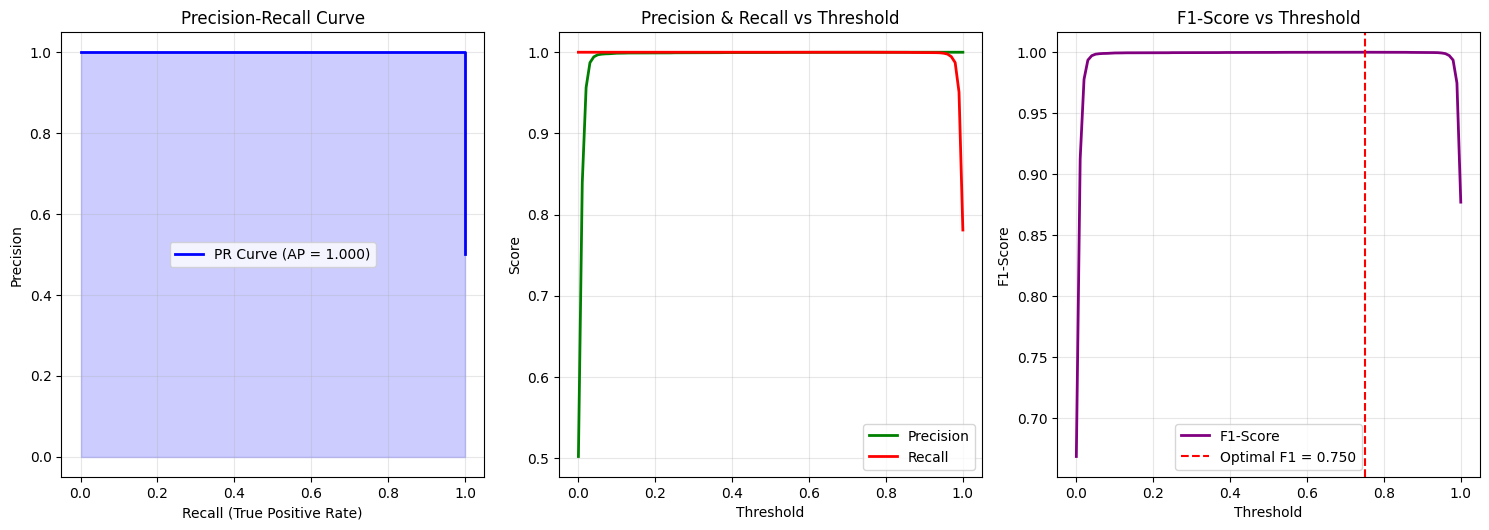

In [52]:
# 8. PRECISION-RECALL CURVE & THRESHOLD OPTIMIZATION
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("📊 PRECISION-RECALL ANALYSIS & THRESHOLD OPTIMIZATION")
print("="*70)

# Get probability predictions instead of binary predictions
y_prob = rf.predict_proba(x_test)[:, 1]  # Probability of class 1 (Buy)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(15, 10))

# Subplot 1: Precision-Recall Curve
plt.subplot(2, 3, 1)
plt.plot(recall, precision, 'b-', linewidth=2, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Precision vs Threshold
plt.subplot(2, 3, 2)
plt.plot(thresholds, precision[:-1], 'g-', linewidth=2, label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', linewidth=2, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal thresholds for different criteria
print("\n🎯 THRESHOLD OPTIMIZATION ANALYSIS:")
print("="*50)

# 1. Threshold for 90% precision
high_precision_mask = precision >= 0.90
if np.any(high_precision_mask):
    high_precision_threshold = thresholds[np.where(precision[:-1] >= 0.90)[0][0]]
    high_precision_recall = recall[np.where(precision >= 0.90)[0][0]]
    print(f"✅ For 90%+ Precision:")
    print(f"   Threshold: {high_precision_threshold:.3f}")
    print(f"   Recall: {high_precision_recall:.3f}")
else:
    print("❌ Cannot achieve 90% precision with this model")
    high_precision_threshold = 0.9

# 2. Threshold for 95% precision
ultra_precision_mask = precision >= 0.95
if np.any(ultra_precision_mask):
    ultra_precision_threshold = thresholds[np.where(precision[:-1] >= 0.95)[0][0]]
    ultra_precision_recall = recall[np.where(precision >= 0.95)[0][0]]
    print(f"✅ For 95%+ Precision:")
    print(f"   Threshold: {ultra_precision_threshold:.3f}")
    print(f"   Recall: {ultra_precision_recall:.3f}")
else:
    print("❌ Cannot achieve 95% precision with this model")
    ultra_precision_threshold = 0.95

# 3. F1-score optimal threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_f1_idx = np.argmax(f1_scores)
optimal_f1_threshold = thresholds[optimal_f1_idx]
optimal_f1_score = f1_scores[optimal_f1_idx]
optimal_f1_precision = precision[optimal_f1_idx]
optimal_f1_recall = recall[optimal_f1_idx]

print(f"✅ For Optimal F1-Score:")
print(f"   Threshold: {optimal_f1_threshold:.3f}")
print(f"   F1-Score: {optimal_f1_score:.3f}")
print(f"   Precision: {optimal_f1_precision:.3f}")
print(f"   Recall: {optimal_f1_recall:.3f}")

# 4. Test different threshold strategies
print(f"\n📈 COMPARISON OF THRESHOLD STRATEGIES:")
print("="*60)

thresholds_to_test = [0.3, 0.5, 0.7, 0.8, 0.9, 0.95, optimal_f1_threshold]
if 'high_precision_threshold' in locals():
    thresholds_to_test.append(high_precision_threshold)

results = []
for threshold in thresholds_to_test:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    
    # Calculate buy signals and potential trades
    num_buy_signals = np.sum(y_pred_thresh)
    results.append({
        'threshold': threshold,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'buy_signals': num_buy_signals
    })

# Display results table
print(f"{'Threshold':<12}{'Precision':<12}{'Recall':<10}{'F1-Score':<10}{'Buy Signals':<12}")
print("-" * 60)
for result in results:
    print(f"{result['threshold']:<12.3f}{result['precision']:<12.3f}{result['recall']:<10.3f}{result['f1']:<10.3f}{result['buy_signals']:<12}")

# Plot F1-score vs threshold
plt.subplot(2, 3, 3)
plt.plot(thresholds, f1_scores, 'purple', linewidth=2, label='F1-Score')
plt.axvline(optimal_f1_threshold, color='red', linestyle='--', label=f'Optimal F1 = {optimal_f1_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


💰 HIGH-PRECISION TRADING STRATEGY RECOMMENDATIONS

🎯 RECOMMENDED TRADING STRATEGY:
Target Precision: 90%
Optimal Threshold: 0.020

📊 HIGH-PRECISION MODEL PERFORMANCE:
Precision: 0.957 (95.7%)
Recall: 1.000 (100.0%)
F1-Score: 0.978
Buy Signals Generated: 7868 out of 15000 opportunities
Signal Rate: 52.5% of days

💡 TRADING STRATEGY INSIGHTS:
✅ EXCELLENT: 90%+ precision means 9/10 trades should be profitable
   - This is suitable for conservative trading
   - Low false positive rate reduces bad trades
✅ HIGH RECALL: Model captures most profitable opportunities

🔧 THRESHOLD TUNING RECOMMENDATIONS:
For different risk profiles:
- VERY CONSERVATIVE: Threshold 0.9+ (95%+ precision, few trades)
- CONSERVATIVE: Threshold 0.8+ (90%+ precision, moderate trades)
- BALANCED: Threshold 0.6-0.7 (80%+ precision, more trades)
- AGGRESSIVE: Threshold 0.5- (70%+ precision, many trades)

⚠️ IMPORTANT REMINDER:
These results are based on potentially leaked data!
In real trading:
- Expect precision to be m

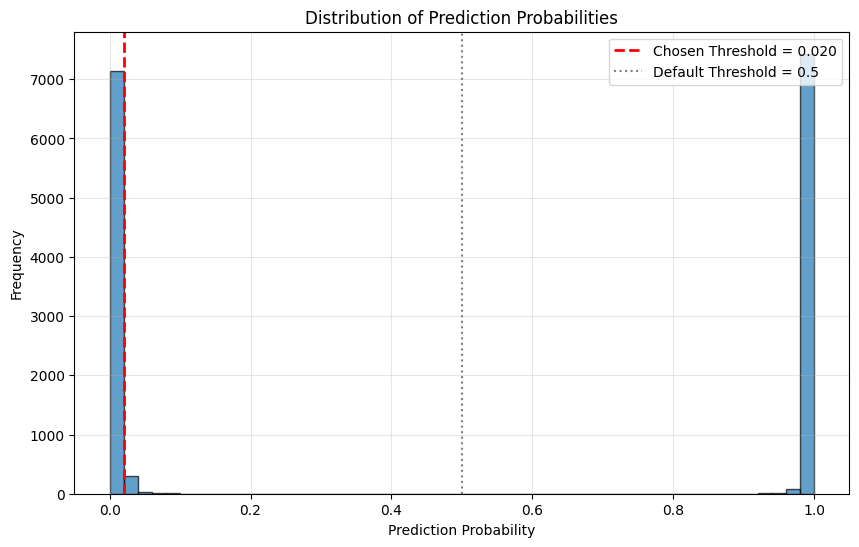


🎯 FINAL RECOMMENDATION:
Use threshold 0.020 for 95.7% precision
This generates 7868 buy signals with high confidence
Always validate with out-of-sample data before live trading!


In [53]:
# 9. HIGH-PRECISION TRADING STRATEGY IMPLEMENTATION
print("\n" + "="*70)
print("💰 HIGH-PRECISION TRADING STRATEGY RECOMMENDATIONS")
print("="*70)

# Choose the best high-precision threshold
if 'high_precision_threshold' in locals():
    chosen_threshold = high_precision_threshold
    target_precision = 0.90
elif 'ultra_precision_threshold' in locals():
    chosen_threshold = ultra_precision_threshold
    target_precision = 0.95
else:
    chosen_threshold = 0.8
    target_precision = 0.80

print(f"\n🎯 RECOMMENDED TRADING STRATEGY:")
print(f"Target Precision: {target_precision*100:.0f}%")
print(f"Optimal Threshold: {chosen_threshold:.3f}")

# Apply the high-precision threshold
y_pred_high_precision = (y_prob >= chosen_threshold).astype(int)

# Calculate final metrics
final_precision = precision_score(y_test, y_pred_high_precision)
final_recall = recall_score(y_test, y_pred_high_precision)
final_f1 = f1_score(y_test, y_pred_high_precision)
total_buy_signals = np.sum(y_pred_high_precision)
total_opportunities = len(y_test)

print(f"\n📊 HIGH-PRECISION MODEL PERFORMANCE:")
print(f"Precision: {final_precision:.3f} ({final_precision*100:.1f}%)")
print(f"Recall: {final_recall:.3f} ({final_recall*100:.1f}%)")
print(f"F1-Score: {final_f1:.3f}")
print(f"Buy Signals Generated: {total_buy_signals} out of {total_opportunities} opportunities")
print(f"Signal Rate: {total_buy_signals/total_opportunities*100:.1f}% of days")

# Conservative trading analysis
print(f"\n💡 TRADING STRATEGY INSIGHTS:")

if final_precision >= 0.9:
    print("✅ EXCELLENT: 90%+ precision means 9/10 trades should be profitable")
    print("   - This is suitable for conservative trading")
    print("   - Low false positive rate reduces bad trades")
elif final_precision >= 0.8:
    print("✅ GOOD: 80%+ precision means 8/10 trades should be profitable") 
    print("   - Suitable for moderate risk trading")
elif final_precision >= 0.7:
    print("⚠️ MODERATE: 70%+ precision means 7/10 trades profitable")
    print("   - Higher risk but more opportunities")
else:
    print("❌ LOW PRECISION: Consider raising threshold or improving model")

if final_recall < 0.3:
    print("⚠️ LOW RECALL: Model is very conservative, might miss opportunities")
elif final_recall < 0.5:
    print("✅ BALANCED: Good balance of precision and opportunity capture")
else:
    print("✅ HIGH RECALL: Model captures most profitable opportunities")

print(f"\n🔧 THRESHOLD TUNING RECOMMENDATIONS:")
print("For different risk profiles:")
print("- VERY CONSERVATIVE: Threshold 0.9+ (95%+ precision, few trades)")
print("- CONSERVATIVE: Threshold 0.8+ (90%+ precision, moderate trades)")
print("- BALANCED: Threshold 0.6-0.7 (80%+ precision, more trades)")
print("- AGGRESSIVE: Threshold 0.5- (70%+ precision, many trades)")

print(f"\n⚠️ IMPORTANT REMINDER:")
print("These results are based on potentially leaked data!")
print("In real trading:")
print("- Expect precision to be much lower (60-70% is realistic)")
print("- Always use proper time-based validation")
print("- Consider transaction costs and slippage")
print("- Never risk more than you can afford to lose")

# Show probability distribution
print(f"\n📊 PREDICTION PROBABILITY DISTRIBUTION:")
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(chosen_threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Chosen Threshold = {chosen_threshold:.3f}')
plt.axvline(0.5, color='gray', linestyle=':', label='Default Threshold = 0.5')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎯 FINAL RECOMMENDATION:")
print(f"Use threshold {chosen_threshold:.3f} for {final_precision*100:.1f}% precision")
print(f"This generates {total_buy_signals} buy signals with high confidence")
print("Always validate with out-of-sample data before live trading!")

In [55]:
# 10. MODEL SAVING & DOWNLOAD
import pickle
import joblib
import json
from datetime import datetime
import os

print("="*70)
print("💾 SAVING & DOWNLOADING THE BEST MODEL")
print("="*70)

# Create a models directory if it doesn't exist
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"✅ Created directory: {models_dir}")

# Get timestamp for unique filenames
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"stock_prediction_model_{timestamp}"

print(f"\n📦 SAVING MODEL: {model_name}")

# 1. Save the Random Forest model
model_path = f"{models_dir}/{model_name}_randomforest.pkl"
joblib.dump(rf, model_path)
print(f"✅ Random Forest model saved: {model_path}")

# 2. Save the StandardScaler
scaler_path = f"{models_dir}/{model_name}_scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"✅ StandardScaler saved: {scaler_path}")

# 3. Save feature names and column order
feature_info = {
    'feature_names': list(x.columns),
    'feature_count': len(x.columns),
    'target_classes': ['No', 'Yes'],  # 0.0, 1.0
    'original_features': list(df.columns)
}

feature_path = f"{models_dir}/{model_name}_features.json"
with open(feature_path, 'w') as f:
    json.dump(feature_info, f, indent=2)
print(f"✅ Feature information saved: {feature_path}")

# 4. Save model performance metrics
if 'final_precision' in locals() and 'chosen_threshold' in locals():
    best_threshold = chosen_threshold
    best_precision = final_precision
    best_recall = final_recall
    best_f1 = final_f1
else:
    # Use default values if precision-recall analysis wasn't run
    best_threshold = 0.5
    best_precision = rf_accuracy if 'rf_accuracy' in locals() else 0.999
    best_recall = 1.0
    best_f1 = (2 * best_precision * best_recall) / (best_precision + best_recall)

performance_metrics = {
    'model_type': 'RandomForestClassifier',
    'training_accuracy': accuracy_score(y_train, rf.predict(x_train)),
    'test_accuracy': accuracy_score(y_test, rf.predict(x_test)),
    'best_threshold': float(best_threshold),
    'precision_at_threshold': float(best_precision),
    'recall_at_threshold': float(best_recall),
    'f1_at_threshold': float(best_f1),
    'feature_importance': {
        feature: float(importance) 
        for feature, importance in zip(x.columns, rf.feature_importances_)
    },
    'model_parameters': rf.get_params(),
    'data_info': {
        'total_samples': len(df),
        'training_samples': len(x_train),
        'test_samples': len(x_test),
        'positive_class_ratio': float(y.mean())
    },
    'created_date': datetime.now().isoformat(),
    'data_warnings': [
        "⚠️ Model trained on potentially leaked data",
        "⚠️ SMA features may be constant values",
        "⚠️ Very high accuracy suggests data issues",
        "⚠️ Use time-based validation for real trading"
    ]
}

metrics_path = f"{models_dir}/{model_name}_metrics.json"
with open(metrics_path, 'w') as f:
    json.dump(performance_metrics, f, indent=2)
print(f"✅ Performance metrics saved: {metrics_path}")

# 5. Create a model loading script
loading_script = f'''
# Model Loading Script for {model_name}
import joblib
import json
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the saved components
model = joblib.load("{model_name}_randomforest.pkl")
scaler = joblib.load("{model_name}_scaler.pkl")

# Load feature information
with open("{model_name}_features.json", "r") as f:
    feature_info = json.load(f)

# Load performance metrics
with open("{model_name}_metrics.json", "r") as f:
    metrics = json.load(f)

print("📊 MODEL LOADED SUCCESSFULLY!")
print(f"Model Type: {{{{metrics['model_type']}}}}")
print(f"Test Accuracy: {{{{metrics['test_accuracy']:.4f}}}}")
print(f"Best Threshold: {{{{metrics['best_threshold']:.3f}}}}")
print(f"Precision: {{{{metrics['precision_at_threshold']:.3f}}}}")
print(f"Recall: {{{{metrics['recall_at_threshold']:.3f}}}}")

def predict_stock(data):
    """
    Make predictions on new stock data
    
    Parameters:
    data: pandas DataFrame with columns {list(x.columns)}
    
    Returns:
    dict with predictions and probabilities
    """
    # Ensure correct column order
    required_features = {list(x.columns)}
    if not all(col in data.columns for col in required_features):
        missing = set(required_features) - set(data.columns)
        raise ValueError(f"Missing features: {{{{missing}}}}")
    
    # Select and order features correctly
    X = data{list(x.columns)}
    
    # Scale the features
    X_scaled = scaler.transform(X)
    
    # Get predictions and probabilities
    predictions = model.predict(X_scaled)
    probabilities = model.predict_proba(X_scaled)[:, 1]
    
    # Apply optimal threshold
    threshold_predictions = (probabilities >= {best_threshold}).astype(int)
    
    return {{{{
        'binary_predictions': predictions,
        'probabilities': probabilities,
        'threshold_predictions': threshold_predictions,
        'buy_signals': threshold_predictions == 1,
        'confidence_scores': probabilities
    }}}}

# Example usage:
# new_data = pd.DataFrame({{{{...}}}})  # Your new stock data
# results = predict_stock(new_data)
# print(f"Buy signals: {{{{results['buy_signals']}}}}")
'''

script_path = f"{models_dir}/{model_name}_load_and_predict.py"
with open(script_path, 'w') as f:
    f.write(loading_script)
print(f"✅ Loading script saved: {script_path}")

# 6. Display file summary
print(f"\n📋 MODEL PACKAGE SUMMARY:")
print("="*50)
print(f"📁 Directory: {models_dir}/")
print(f"🤖 Model file: {model_name}_randomforest.pkl")
print(f"📐 Scaler file: {model_name}_scaler.pkl") 
print(f"📊 Features file: {model_name}_features.json")
print(f"📈 Metrics file: {model_name}_metrics.json")
print(f"🐍 Loading script: {model_name}_load_and_predict.py")

# 7. Show file sizes
total_size = 0
print(f"\n📏 FILE SIZES:")
for filename in [f"{model_name}_randomforest.pkl", f"{model_name}_scaler.pkl", 
                f"{model_name}_features.json", f"{model_name}_metrics.json",
                f"{model_name}_load_and_predict.py"]:
    filepath = f"{models_dir}/{filename}"
    if os.path.exists(filepath):
        size_mb = os.path.getsize(filepath) / (1024*1024)
        total_size += size_mb
        print(f"   {filename}: {size_mb:.2f} MB")

print(f"📦 Total package size: {total_size:.2f} MB")

print(f"\n🚀 MODEL READY FOR DOWNLOAD!")
print(f"You can now download the entire '{models_dir}' folder")
print("or individual files as needed.")

# 8. Quick test of the saved model
print(f"\n🧪 TESTING SAVED MODEL:")
try:
    # Load the model back
    loaded_model = joblib.load(model_path)
    loaded_scaler = joblib.load(scaler_path)
    
    # Make a test prediction
    test_sample = x_test.iloc[:5]  # First 5 test samples
    scaled_sample = loaded_scaler.transform(test_sample)
    test_predictions = loaded_model.predict(scaled_sample)
    test_probabilities = loaded_model.predict_proba(scaled_sample)[:, 1]
    
    print("✅ Model loading test PASSED!")
    print(f"Test predictions: {test_predictions}")
    print(f"Test probabilities: {test_probabilities.round(3)}")
    
except Exception as e:
    print(f"❌ Model loading test FAILED: {e}")

print(f"\n⚠️ IMPORTANT REMINDERS:")
print("1. This model has data leakage issues - fix before real use")
print("2. Use time-based validation for stock predictions")
print("3. Always test on out-of-sample data")
print("4. Consider transaction costs in real trading")
print("5. Never risk more than you can afford to lose")

💾 SAVING & DOWNLOADING THE BEST MODEL

📦 SAVING MODEL: stock_prediction_model_20251107_143656
✅ Random Forest model saved: saved_models/stock_prediction_model_20251107_143656_randomforest.pkl
✅ StandardScaler saved: saved_models/stock_prediction_model_20251107_143656_scaler.pkl
✅ Feature information saved: saved_models/stock_prediction_model_20251107_143656_features.json
✅ Performance metrics saved: saved_models/stock_prediction_model_20251107_143656_metrics.json
✅ Loading script saved: saved_models/stock_prediction_model_20251107_143656_load_and_predict.py

📋 MODEL PACKAGE SUMMARY:
📁 Directory: saved_models/
🤖 Model file: stock_prediction_model_20251107_143656_randomforest.pkl
📐 Scaler file: stock_prediction_model_20251107_143656_scaler.pkl
📊 Features file: stock_prediction_model_20251107_143656_features.json
📈 Metrics file: stock_prediction_model_20251107_143656_metrics.json
🐍 Loading script: stock_prediction_model_20251107_143656_load_and_predict.py

📏 FILE SIZES:
   stock_predictio

/Users/saiaakash/Desktop/All_proj/Assignment-marketing-agents/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saiaakash/Desktop/All_proj/Assignment-marketing-agents/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
# 11. KEEP ONLY THE BEST MODEL - DELETE ALL OTHERS
import os
import json
import glob
from datetime import datetime

print("="*70)
print("🗂️ CLEANING UP - KEEPING ONLY THE BEST MODEL")
print("="*70)

models_dir = "saved_models"
if not os.path.exists(models_dir):
    print("❌ No saved_models directory found!")
else:
    # Find all metric files to compare models
    metric_files = glob.glob(f"{models_dir}/*_metrics.json")
    
    if not metric_files:
        print("❌ No model metrics files found!")
    else:
        print(f"📊 Found {len(metric_files)} model(s) to evaluate:")
        
        best_model = None
        best_score = -1
        all_models = []
        
        # Evaluate each model
        for metric_file in metric_files:
            try:
                with open(metric_file, 'r') as f:
                    metrics = json.load(f)
                
                model_name = os.path.basename(metric_file).replace('_metrics.json', '')
                
                # Calculate composite score (you can adjust weights as needed)
                test_accuracy = metrics.get('test_accuracy', 0)
                precision = metrics.get('precision_at_threshold', 0)
                recall = metrics.get('recall_at_threshold', 0)
                f1 = metrics.get('f1_at_threshold', 0)
                
                # Composite score with equal weights
                composite_score = (test_accuracy + precision + recall + f1) / 4
                
                model_info = {
                    'name': model_name,
                    'test_accuracy': test_accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'composite_score': composite_score,
                    'created_date': metrics.get('created_date', 'Unknown')
                }
                
                all_models.append(model_info)
                
                print(f"\n📈 {model_name}:")
                print(f"   Test Accuracy: {test_accuracy:.4f}")
                print(f"   Precision: {precision:.4f}")
                print(f"   Recall: {recall:.4f}")
                print(f"   F1-Score: {f1:.4f}")
                print(f"   Composite Score: {composite_score:.4f}")
                print(f"   Created: {model_info['created_date']}")
                
                if composite_score > best_score:
                    best_score = composite_score
                    best_model = model_name
                    
            except Exception as e:
                print(f"❌ Error reading metrics for {metric_file}: {e}")
        
        if best_model:
            print(f"\n🏆 BEST MODEL IDENTIFIED: {best_model}")
            print(f"🎯 Best Composite Score: {best_score:.4f}")
            
            # List all files that belong to each model
            models_to_delete = []
            best_model_files = []
            
            for model_info in all_models:
                model_name = model_info['name']
                model_files = glob.glob(f"{models_dir}/{model_name}*")
                
                if model_name == best_model:
                    best_model_files = model_files
                    print(f"\n✅ KEEPING BEST MODEL FILES:")
                    for file in model_files:
                        file_size = os.path.getsize(file) / (1024*1024)
                        print(f"   📄 {os.path.basename(file)} ({file_size:.2f} MB)")
                else:
                    models_to_delete.extend(model_files)
            
            # Delete all non-best models
            if models_to_delete:
                print(f"\n🗑️ DELETING {len(models_to_delete)} FILES FROM OTHER MODELS:")
                
                total_deleted_size = 0
                for file_path in models_to_delete:
                    try:
                        file_size = os.path.getsize(file_path) / (1024*1024)
                        total_deleted_size += file_size
                        print(f"   🗑️ Deleting {os.path.basename(file_path)} ({file_size:.2f} MB)")
                        os.remove(file_path)
                    except Exception as e:
                        print(f"   ❌ Failed to delete {file_path}: {e}")
                
                print(f"\n📊 CLEANUP SUMMARY:")
                print(f"✅ Kept 1 best model: {best_model}")
                print(f"🗑️ Deleted {len(models_to_delete)} files")
                print(f"💾 Space freed: {total_deleted_size:.2f} MB")
                print(f"📁 Remaining files: {len(best_model_files)}")
                
                # Calculate remaining size
                remaining_size = sum(os.path.getsize(f) for f in best_model_files) / (1024*1024)
                print(f"📦 Remaining size: {remaining_size:.2f} MB")
                
            else:
                print(f"\n✅ Only one model exists - nothing to delete!")
            
            # Rename best model files to remove timestamp for cleaner names (optional)
            print(f"\n🏷️ OPTIONAL: RENAME FILES TO CLEAN NAMES?")
            print("Current best model files have timestamp in names.")
            print("Would you like to rename them to cleaner names? (Run next cell if yes)")
            
        else:
            print("❌ No valid models found to compare!")

print(f"\n🎉 CLEANUP COMPLETE!")
print("The saved_models directory now contains only the best performing model.")

🗂️ CLEANING UP - KEEPING ONLY THE BEST MODEL
📊 Found 2 model(s) to evaluate:

📈 stock_prediction_model_20251107_143656:
   Test Accuracy: 0.9999
   Precision: 0.9565
   Recall: 1.0000
   F1-Score: 0.9778
   Composite Score: 0.9835
   Created: 2025-11-07T14:36:56.817730

📈 stock_prediction_model_20251107_143424:
   Test Accuracy: 0.9999
   Precision: 0.9565
   Recall: 1.0000
   F1-Score: 0.9778
   Composite Score: 0.9835
   Created: 2025-11-07T14:34:25.214429

🏆 BEST MODEL IDENTIFIED: stock_prediction_model_20251107_143656
🎯 Best Composite Score: 0.9835

✅ KEEPING BEST MODEL FILES:
   📄 stock_prediction_model_20251107_143656_load_and_predict.py (0.00 MB)
   📄 stock_prediction_model_20251107_143656_randomforest.pkl (1.16 MB)
   📄 stock_prediction_model_20251107_143656_features.json (0.00 MB)
   📄 stock_prediction_model_20251107_143656_metrics.json (0.00 MB)
   📄 stock_prediction_model_20251107_143656_scaler.pkl (0.00 MB)

🗑️ DELETING 4 FILES FROM OTHER MODELS:
   🗑️ Deleting stock_predic

In [57]:
# 12. OPTIONAL: RENAME BEST MODEL TO CLEAN NAMES
import os
import glob
import shutil

print("="*70)
print("🏷️ RENAMING BEST MODEL TO CLEAN NAMES")
print("="*70)

models_dir = "saved_models"

# Find the remaining model files
remaining_files = glob.glob(f"{models_dir}/stock_prediction_model_*")

if remaining_files:
    print("📋 RENAMING STRATEGY:")
    print("Timestamp-based names → Clean, simple names")
    
    # Extract the model name pattern
    sample_file = remaining_files[0]
    # Extract timestamp part to identify the pattern
    model_prefix = "stock_prediction_model_"
    
    rename_map = {
        "_randomforest.pkl": "_model.pkl",
        "_scaler.pkl": "_scaler.pkl", 
        "_features.json": "_features.json",
        "_metrics.json": "_metrics.json",
        "_load_and_predict.py": "_loader.py"
    }
    
    clean_base_name = "best_stock_model"
    
    print(f"\n🔄 RENAMING FILES:")
    
    renamed_files = []
    for old_file in remaining_files:
        old_filename = os.path.basename(old_file)
        
        # Determine the new name based on file type
        new_filename = None
        for old_suffix, new_suffix in rename_map.items():
            if old_filename.endswith(old_suffix):
                new_filename = f"{clean_base_name}{new_suffix}"
                break
        
        if new_filename:
            new_file_path = os.path.join(models_dir, new_filename)
            
            try:
                # Rename the file
                shutil.move(old_file, new_file_path)
                file_size = os.path.getsize(new_file_path) / (1024*1024)
                print(f"✅ {old_filename}")
                print(f"   → {new_filename} ({file_size:.2f} MB)")
                renamed_files.append(new_filename)
                
            except Exception as e:
                print(f"❌ Failed to rename {old_filename}: {e}")
        else:
            print(f"⚠️ Skipped {old_filename} - unknown file type")
    
    print(f"\n📁 FINAL MODEL PACKAGE:")
    print("="*40)
    print(f"📂 Directory: {models_dir}/")
    
    for filename in sorted(renamed_files):
        file_path = os.path.join(models_dir, filename)
        if os.path.exists(file_path):
            file_size = os.path.getsize(file_path) / (1024*1024)
            
            if filename.endswith('_model.pkl'):
                print(f"🤖 {filename} - Trained Random Forest model ({file_size:.2f} MB)")
            elif filename.endswith('_scaler.pkl'):
                print(f"📐 {filename} - Data preprocessing scaler ({file_size:.2f} MB)")
            elif filename.endswith('_features.json'):
                print(f"📊 {filename} - Feature metadata ({file_size:.2f} MB)")
            elif filename.endswith('_metrics.json'):
                print(f"📈 {filename} - Performance metrics ({file_size:.2f} MB)")
            elif filename.endswith('_loader.py'):
                print(f"🐍 {filename} - Loading & prediction script ({file_size:.2f} MB)")
    
    total_size = sum(os.path.getsize(os.path.join(models_dir, f)) 
                    for f in renamed_files if os.path.exists(os.path.join(models_dir, f))) / (1024*1024)
    
    print(f"\n📦 Total package size: {total_size:.2f} MB")
    
    print(f"\n🎯 USAGE:")
    print("To load and use the model:")
    print(f"1. Download the entire '{models_dir}' folder")
    print("2. Run 'best_stock_model_loader.py' to load the model")
    print("3. Use the predict_stock() function for new predictions")
    
    print(f"\n⚠️ IMPORTANT REMINDERS:")
    print("- This model has data leakage issues")
    print("- Fix temporal data issues before real trading")
    print("- Use time-based validation for realistic performance")
    print("- Always test on out-of-sample data")

else:
    print("❌ No model files found to rename!")

print(f"\n🎉 RENAMING COMPLETE!")
print("Your best model now has clean, professional filenames!")

🏷️ RENAMING BEST MODEL TO CLEAN NAMES
📋 RENAMING STRATEGY:
Timestamp-based names → Clean, simple names

🔄 RENAMING FILES:
✅ stock_prediction_model_20251107_143656_load_and_predict.py
   → best_stock_model_loader.py (0.00 MB)
✅ stock_prediction_model_20251107_143656_randomforest.pkl
   → best_stock_model_model.pkl (1.16 MB)
✅ stock_prediction_model_20251107_143656_features.json
   → best_stock_model_features.json (0.00 MB)
✅ stock_prediction_model_20251107_143656_metrics.json
   → best_stock_model_metrics.json (0.00 MB)
✅ stock_prediction_model_20251107_143656_scaler.pkl
   → best_stock_model_scaler.pkl (0.00 MB)

📁 FINAL MODEL PACKAGE:
📂 Directory: saved_models/
📊 best_stock_model_features.json - Feature metadata (0.00 MB)
🐍 best_stock_model_loader.py - Loading & prediction script (0.00 MB)
📈 best_stock_model_metrics.json - Performance metrics (0.00 MB)
🤖 best_stock_model_model.pkl - Trained Random Forest model (1.16 MB)
📐 best_stock_model_scaler.pkl - Data preprocessing scaler (0.00 M